# Machine Learning - CEP

### Standard Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset 

In [2]:
df = pd.read_csv('weather.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


### Getting Insights from the Dataset

In [3]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.shape

(96453, 12)

In [6]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

#### Dropping null values

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [9]:
df.shape

(95936, 12)

In [10]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Data Visualization

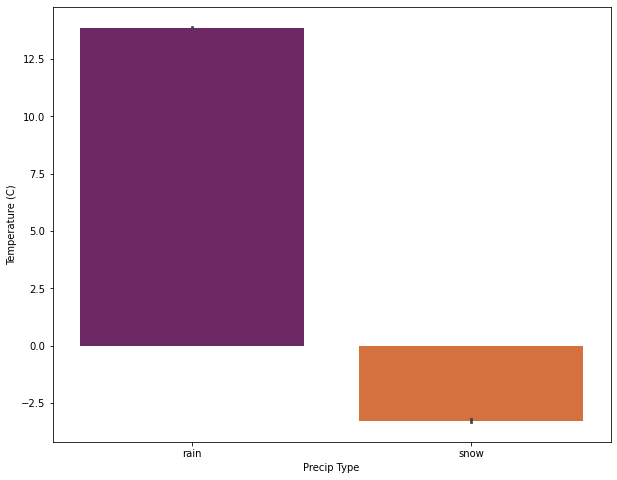

In [11]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'Precip Type', y = 'Temperature (C)', data = df, palette='inferno')
plt.show()

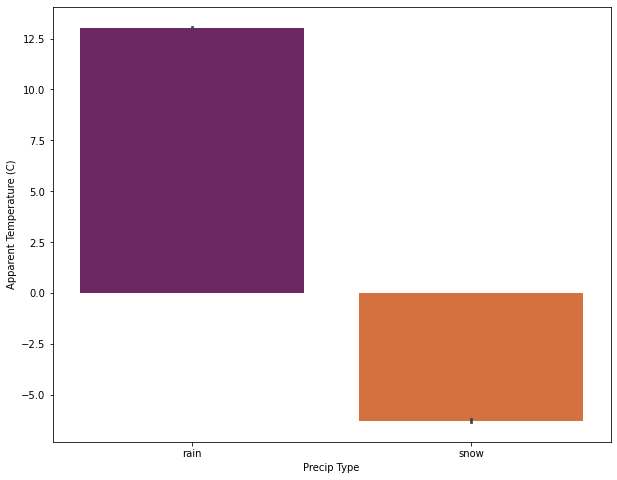

In [12]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'Precip Type', y = 'Apparent Temperature (C)', data = df, palette='inferno')
plt.show()

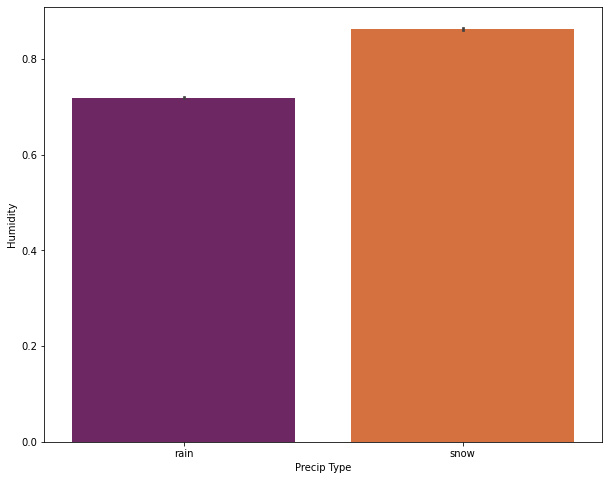

In [13]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'Precip Type', y = 'Humidity', data = df, palette='inferno')
plt.show()

In [14]:
import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [15]:
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [16]:
pd.options.mode.chained_assignment = None

### Extracting Year from the column 'Formatted Date'

In [17]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [18]:
df['Year'] = df['Formatted Date'].dt.year

In [19]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006


### Checking for any redundant value in column 'Year'

In [20]:
df['Year'].value_counts()

2010    8784
2008    8784
2006    8760
2007    8760
2009    8760
2011    8760
2013    8760
2015    8760
2014    8757
2012    8641
2016    8409
2005       1
Name: Year, dtype: int64

In [21]:
df[df.Year==2005]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year
2880,2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.05,0.89,17.1143,140.0,9.982,0.0,1016.66,Mostly cloudy throughout the day.,2005


### Removing the row where Year is equal to 2005 b/c it is the only one entry in the entire dataset which seems out of place and redundant

In [22]:
df = df.loc[df['Year'] != 2005]
df[df.Year==2005]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year


In [23]:
temp = df.groupby(['Year'], as_index=False)['Temperature (C)'].mean().sort_values(by='Temperature (C)')
temp

,Year,Temperature (C)
4,2010,11.200176
0,2006,11.215225
5,2011,11.524934
7,2013,11.941017
6,2012,11.949909
10,2016,12.123330
1,2007,12.134677
2,2008,12.161819
3,2009,12.269682
9,2015,12.312088


## Continued Data Visualization

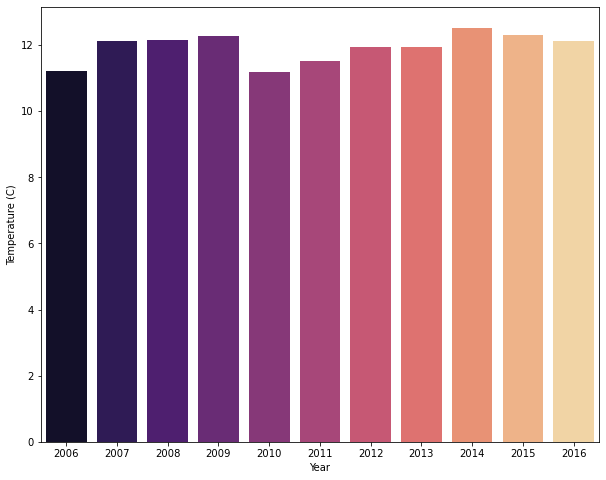

In [24]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Year',y='Temperature (C)',data=temp, palette='magma')
plt.show()

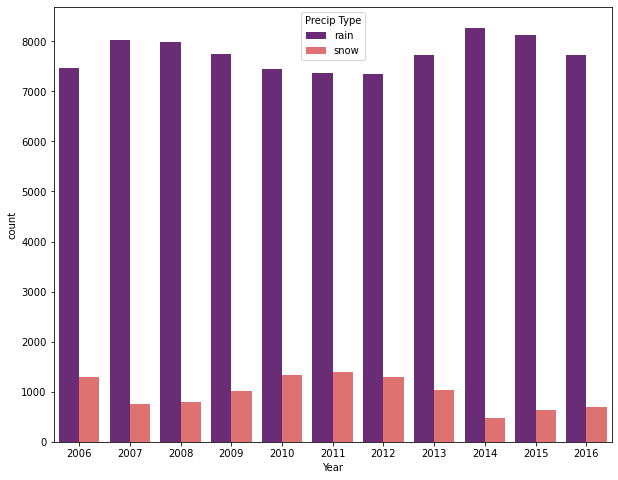

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Year', hue='Precip Type', data=df, palette='magma')
plt.show()

In [26]:
pv_df = df.pivot_table('Temperature (C)',
                                index='Year',
                                columns='Precip Type', aggfunc='mean')
pv_df

Precip Type,rain,snow
Year,,
2006,13.708034,-3.193675
2007,13.537126,-2.953423
2008,13.702243,-3.232784
2009,14.390530,-3.859594
2010,13.854148,-3.674035
2011,14.260676,-2.881744
2012,14.958689,-5.055838
2013,13.775156,-1.900027
2014,13.465303,-3.454227


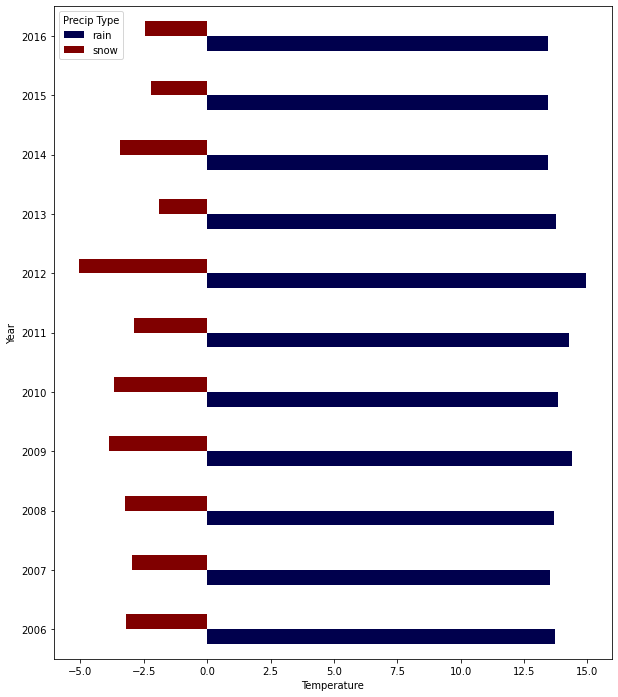

In [27]:
pv_df.plot(kind='barh',figsize=(10,12),cmap='seismic')
plt.xlabel("Temperature")
plt.show()

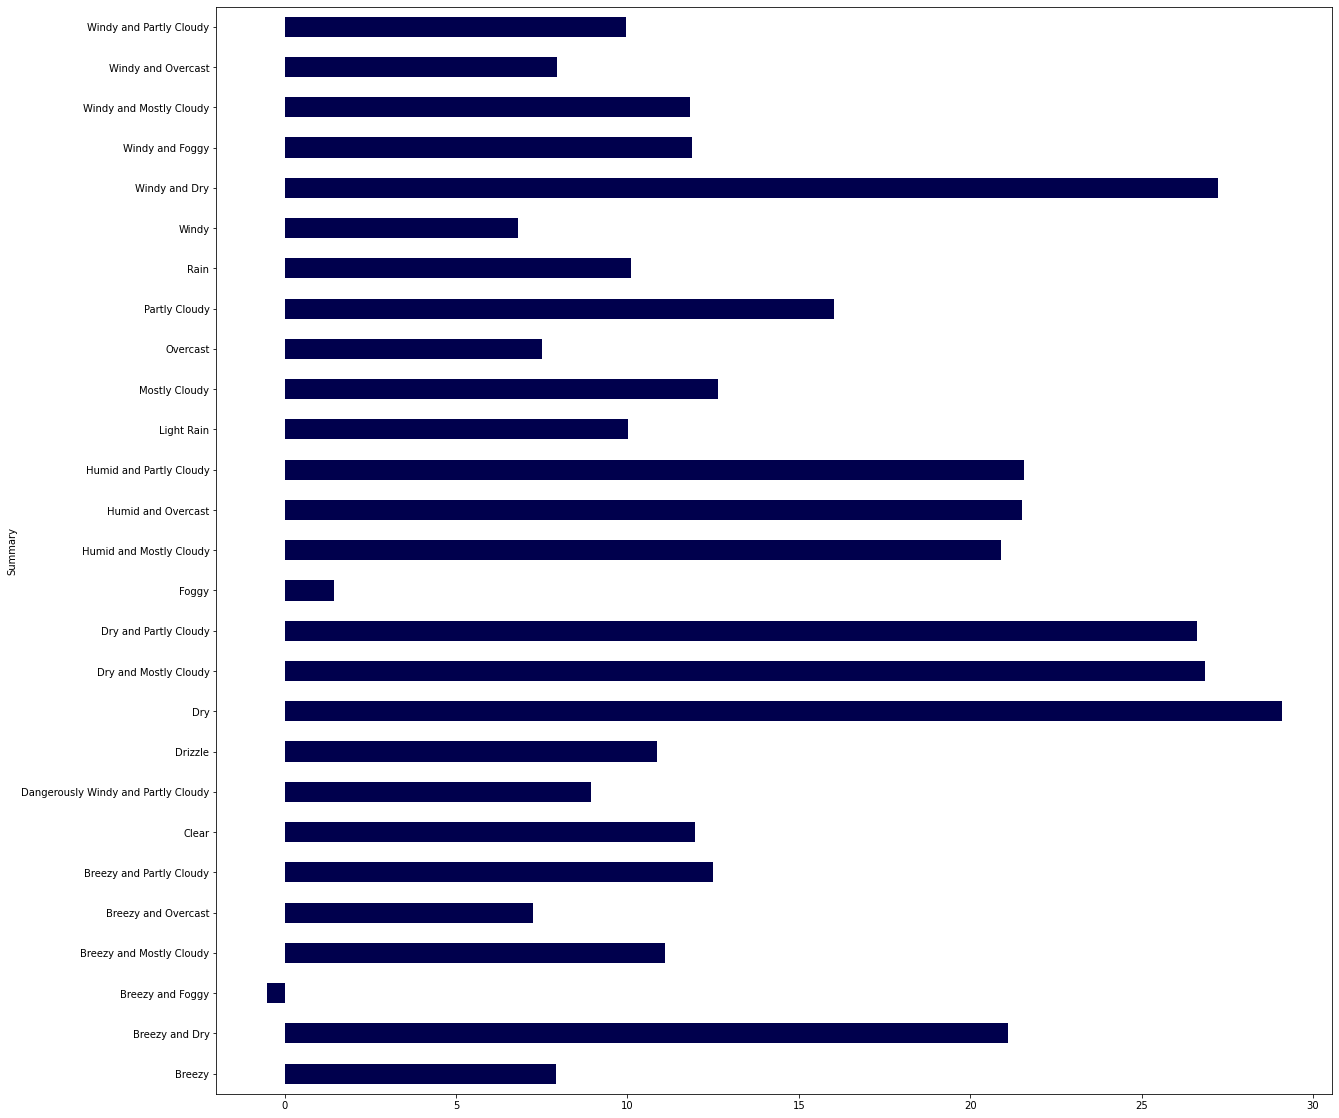

In [28]:
plt.figure(figsize=(20, 20))
df.groupby('Summary')['Temperature (C)'].mean().plot(kind='barh',cmap='seismic')
plt.show()

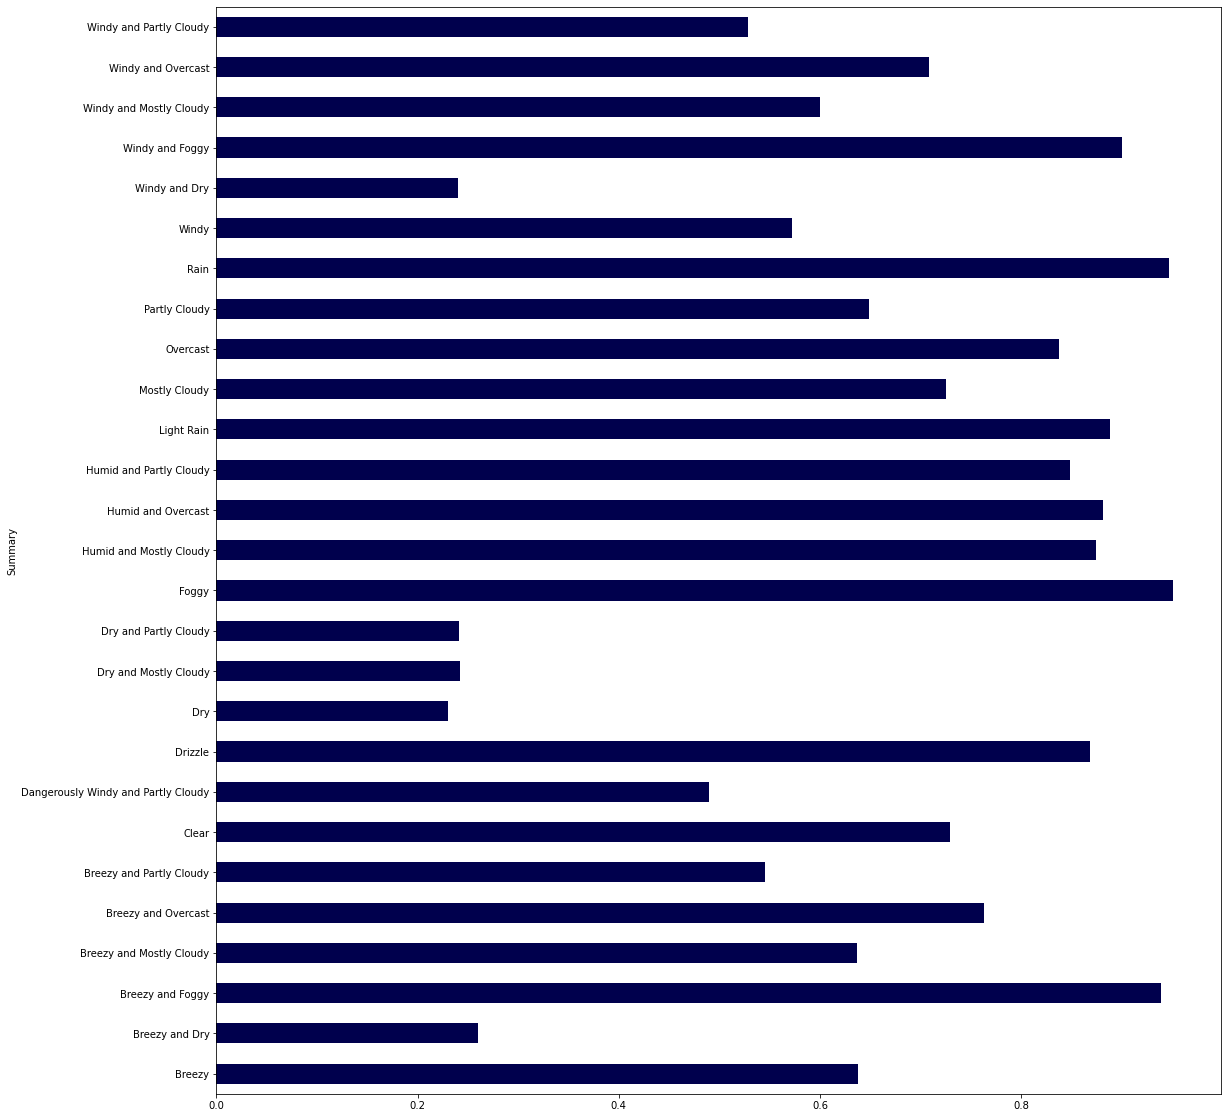

In [29]:
plt.figure(figsize=(18, 20))
df.groupby('Summary')['Humidity'].mean().plot(kind='barh',cmap='seismic')
plt.show()

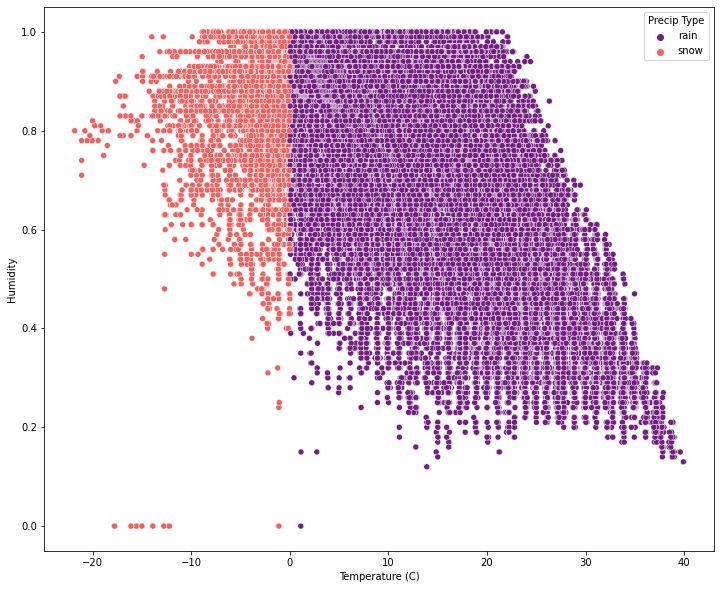

In [30]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='Temperature (C)', y='Humidity', hue='Precip Type', palette='magma')
plt.show()

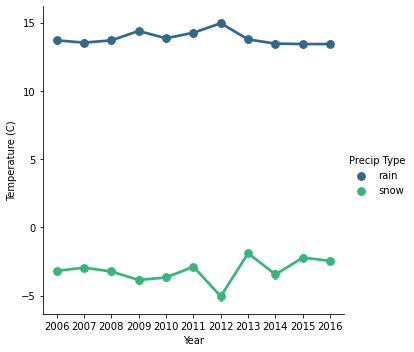

In [31]:
sns.catplot(x='Year', y='Temperature (C)', hue='Precip Type', data=df, kind='point', palette='viridis')

## Data PreProcessing

In [32]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year
count,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000,95935.0,95935.000000,95935.000000
mean,11.941094,10.862687,0.734839,10.804870,187.519268,10.362406,0.0,1003.149897,2010.979371
std,9.570650,10.717759,0.195724,6.920734,107.385801,4.173801,0.0,117.277579,3.154915
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2006.000000
25%,4.605556,2.277778,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000,2008.000000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000,2011.000000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000,2014.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,2016.000000


In [33]:
df[df['Pressure (millibars)'] == 0]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year
858,2006-08-14 16:00:00+00:00,Partly Cloudy,rain,22.477778,22.477778,0.58,10.8192,159.0,11.1251,0.0,0.0,Mostly cloudy until night.,2006
874,2006-08-15 08:00:00+00:00,Partly Cloudy,rain,21.061111,21.061111,0.73,7.7924,264.0,11.2056,0.0,0.0,Partly cloudy until evening.,2006
924,2006-08-17 10:00:00+00:00,Clear,rain,28.838889,29.611111,0.51,9.6600,177.0,9.9820,0.0,0.0,Partly cloudy until morning.,2006
945,2006-08-18 07:00:00+00:00,Clear,rain,24.950000,24.950000,0.69,16.0195,180.0,9.9015,0.0,0.0,Partly cloudy starting overnight continuing un...,2006
1074,2006-08-22 16:00:00+00:00,Partly Cloudy,rain,23.811111,23.811111,0.45,16.0195,290.0,11.2056,0.0,0.0,Partly cloudy starting in the morning.,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93147,2016-03-23 05:00:00+00:00,Clear,rain,2.750000,-0.322222,0.82,11.3988,39.0,6.1180,0.0,0.0,Overcast starting in the afternoon.,2016
93149,2016-03-23 07:00:00+00:00,Clear,rain,3.838889,1.716667,0.82,8.2593,58.0,6.1180,0.0,0.0,Overcast starting in the afternoon.,2016
93150,2016-03-23 08:00:00+00:00,Clear,rain,5.000000,4.005556,0.92,5.2486,84.0,4.9910,0.0,0.0,Overcast starting in the afternoon.,2016
93152,2016-03-23 10:00:00+00:00,Clear,rain,5.050000,2.472222,0.92,11.2700,10.0,4.9910,0.0,0.0,Overcast starting in the afternoon.,2016


### 0 millibars Pressure on earth is not possible, so all the entries with 0 millibars Pressure does not make sense, so removing them.

In [34]:
df = df.loc[df['Pressure (millibars)'] != 0]
df[df['Pressure (millibars)'] == 0]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year


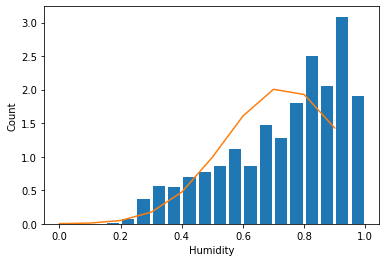

In [35]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Humidity, bins=20, rwidth=0.8, density=True)
plt.xlabel('Humidity')
plt.ylabel('Count')

rng = np.arange(df.Humidity.min(), df.Humidity.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Humidity.mean(),df.Humidity.std()))

### Removing Outliers by Percentile method

In [36]:
min_thresold, max_thresold = df['Humidity'].quantile([0.001, 0.999])
min_thresold, max_thresold

(0.19, 1.0)

In [37]:
df[df['Humidity'] < min_thresold]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year
9157,2007-04-23 11:00:00+00:00,Dry and Partly Cloudy,rain,20.072222,20.072222,0.17,2.8014,310.0,9.9820,0.0,1025.13,Partly cloudy starting in the morning continui...,2007
9160,2007-04-23 14:00:00+00:00,Dry and Partly Cloudy,rain,21.205556,21.205556,0.15,5.2969,128.0,9.9820,0.0,1022.73,Partly cloudy starting in the morning continui...,2007
9161,2007-04-23 15:00:00+00:00,Dry and Partly Cloudy,rain,21.244444,21.244444,0.15,2.5921,198.0,10.3523,0.0,1022.38,Partly cloudy starting in the morning continui...,2007
9162,2007-04-23 16:00:00+00:00,Dry and Partly Cloudy,rain,20.161111,20.161111,0.18,3.6708,172.0,9.9820,0.0,1021.70,Partly cloudy starting in the morning continui...,2007
12614,2007-07-17 12:00:00+00:00,Clear,rain,36.972222,34.855556,0.17,19.4327,207.0,10.3523,0.0,1015.87,Clear throughout the day.,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62802,2013-08-07 16:00:00+00:00,Dry and Partly Cloudy,rain,36.083333,34.033333,0.18,5.2164,121.0,16.1000,0.0,1013.20,Partly cloudy starting in the afternoon contin...,2013
68411,2013-11-26 11:00:00+00:00,Breezy and Mostly Cloudy,rain,2.733333,-2.950000,0.15,30.6705,0.0,10.2557,0.0,1019.73,Mostly cloudy throughout the day and breezy ov...,2013
68422,2013-11-26 22:00:00+00:00,Breezy and Overcast,rain,1.133333,-5.383333,0.15,34.2930,20.0,16.1000,0.0,1021.51,Mostly cloudy throughout the day and breezy ov...,2013
75300,2014-03-11 14:00:00+00:00,Clear,rain,15.022222,15.022222,0.18,17.2753,29.0,16.1000,0.0,1024.41,Partly cloudy until afternoon.,2014


In [38]:
df = df.loc[df['Humidity'] != 0.19]

In [39]:
df[df['Visibility (km)'] == 0]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year
1640,2006-12-16 07:00:00+00:00,Foggy,snow,-2.244444,-2.244444,1.00,0.0000,0.0,0.0,0.0,1032.61,Foggy throughout the day.,2006
1641,2006-12-16 08:00:00+00:00,Foggy,snow,-2.244444,-2.244444,1.00,3.2200,170.0,0.0,0.0,1032.23,Foggy throughout the day.,2006
1661,2006-12-17 04:00:00+00:00,Foggy,snow,-2.200000,-2.200000,1.00,3.1717,158.0,0.0,0.0,1028.01,Foggy throughout the day.,2006
1662,2006-12-17 05:00:00+00:00,Foggy,snow,-2.150000,-2.150000,1.00,3.2200,90.0,0.0,0.0,1027.72,Foggy throughout the day.,2006
1664,2006-12-17 07:00:00+00:00,Foggy,snow,-2.150000,-5.177778,1.00,7.8085,19.0,0.0,0.0,1028.11,Foggy throughout the day.,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95499,2016-10-29 05:00:00+00:00,Mostly Cloudy,rain,6.550000,3.816667,0.94,14.0231,280.0,0.0,0.0,1028.27,Mostly cloudy until evening.,2016
95500,2016-10-29 06:00:00+00:00,Mostly Cloudy,rain,6.988889,4.327778,0.92,14.2163,281.0,0.0,0.0,1028.22,Mostly cloudy until evening.,2016
95501,2016-10-29 07:00:00+00:00,Mostly Cloudy,rain,8.200000,5.683333,0.87,15.1984,287.0,0.0,0.0,1028.17,Mostly cloudy until evening.,2016
95502,2016-10-29 08:00:00+00:00,Mostly Cloudy,rain,9.894444,7.577778,0.80,16.9050,294.0,0.0,0.0,1028.11,Mostly cloudy until evening.,2016


In [40]:
min_thresold, max_thresold = df['Visibility (km)'].quantile([0.001, 0.999])
min_thresold, max_thresold

(0.0, 16.1)

In [41]:
df[df['Visibility (km)'] < min_thresold]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year


In [42]:
df = df.loc[df['Visibility (km)'] != 0.1449]

In [43]:
# sns.pairplot(df, vars=['Humidity', 'Temperature (C)'], hue='Summary')

In [44]:
df2 = df.copy()
df2.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006


### All entries of Column 'Loud Cover' are 0, will drop it eventually for the working dataset.

In [45]:
df2['Loud Cover'].unique()

array([0.])

##### Formatted Date, Daily Summary, Apparent Temperature, Loud Cover are useless columns and won't make any difference on our model, Precip Type and Year have negligible effect on the model, and Wind bearing is actually the direction of the wind, Hence all these columns are dropped.

In [46]:
df2 = df2.drop(['Formatted Date', 'Daily Summary','Precip Type', 'Apparent Temperature (C)', 'Loud Cover', 'Year',
               'Wind Bearing (degrees)'],axis=1)

In [47]:
df2.head()

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,Partly Cloudy,9.472222,0.89,14.1197,15.8263,1015.13
1,Partly Cloudy,9.355556,0.86,14.2646,15.8263,1015.63
2,Mostly Cloudy,9.377778,0.89,3.9284,14.9569,1015.94
3,Partly Cloudy,8.288889,0.83,14.1036,15.8263,1016.41
4,Mostly Cloudy,8.755556,0.83,11.0446,15.8263,1016.51


In [48]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [49]:
df['Summary'].value_counts()

Partly Cloudy                          31491
Mostly Cloudy                          27778
Overcast                               16361
Clear                                  10033
Foggy                                   6984
Breezy and Overcast                      525
Breezy and Mostly Cloudy                 511
Breezy and Partly Cloudy                 379
Dry and Partly Cloudy                     79
Light Rain                                63
Windy and Partly Cloudy                   63
Windy and Overcast                        44
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   34
Dry                                       31
Breezy                                    30
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Humid and Overcast                         7
Windy and 

In [50]:
entries_to_remove = ['Breezy and Overcast', 'Breezy and Mostly Cloudy', 'Breezy and Partly Cloudy',
                     'Dry and Partly Cloudy', 'Light Rain', 'Windy and Partly Cloudy', 'Windy and Overcast',
                     'Humid and Mostly Cloudy', 'Drizzle', 'Windy and Mostly Cloudy', 'Humid and Partly Cloudy',
                     'Dry and Mostly Cloudy', 'Rain', 'Humid and Overcast', 'Dangerously Windy and Partly Cloudy',
                     'Windy','Mostly Cloudy']

df2 = df2.loc[~df['Summary'].isin(entries_to_remove)].dropna()

In [51]:
df2['Summary'].value_counts()

Partly Cloudy       31491
Overcast            16361
Clear               10033
Foggy                6984
Breezy and Foggy       35
Dry                    31
Breezy                 30
Windy and Foggy         4
Windy and Dry           1
Breezy and Dry          1
Name: Summary, dtype: int64

In [52]:
df3 = df2.copy()

### Scaling down 'Summary' entries to 3 classes.

In [53]:
mapping = {
    'Cloudy': ['Partly Cloudy','Overcast'],
    'Clear': ['Clear','Dry','Breezy and Dry','Windy and Dry','Breezy'],
    'Foggy': ['Foggy', 'Windy and Foggy', 'Breezy and Foggy'],
}

In [54]:
df3['Summary'] = df2['Summary'].map({entry: category for category, entries in mapping.items() for entry in entries})
df3

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,Cloudy,9.472222,0.89,14.1197,15.8263,1015.13
1,Cloudy,9.355556,0.86,14.2646,15.8263,1015.63
3,Cloudy,8.288889,0.83,14.1036,15.8263,1016.41
5,Cloudy,9.222222,0.85,13.9587,14.9569,1016.66
6,Cloudy,7.733333,0.95,12.3648,9.9820,1016.72
...,...,...,...,...,...,...
96448,Cloudy,26.016667,0.43,10.9963,16.1000,1014.36
96449,Cloudy,24.583333,0.48,10.0947,15.5526,1015.16
96450,Cloudy,22.038889,0.56,8.9838,16.1000,1015.66
96451,Cloudy,21.522222,0.60,10.5294,16.1000,1015.95


In [55]:
df3['Summary'].unique()

array(['Cloudy', 'Foggy', 'Clear'], dtype=object)

In [56]:
df3['Summary'].value_counts()

Cloudy    47852
Clear     10096
Foggy      7023
Name: Summary, dtype: int64

In [57]:
df3 = df3.dropna()

In [58]:
df3['Summary'].unique()

array(['Cloudy', 'Foggy', 'Clear'], dtype=object)

<AxesSubplot:ylabel='Summary'>

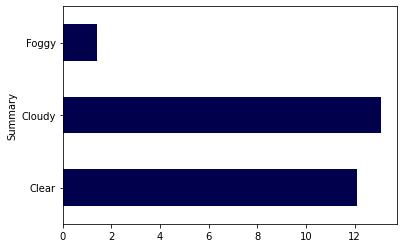

In [59]:
df3.groupby('Summary')['Temperature (C)'].mean().plot(kind='barh',cmap='seismic')

In [60]:
df3.head()

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,Cloudy,9.472222,0.89,14.1197,15.8263,1015.13
1,Cloudy,9.355556,0.86,14.2646,15.8263,1015.63
3,Cloudy,8.288889,0.83,14.1036,15.8263,1016.41
5,Cloudy,9.222222,0.85,13.9587,14.9569,1016.66
6,Cloudy,7.733333,0.95,12.3648,9.9820,1016.72


### Assigning X (predictor) and Y (target) variable

In [61]:
X = df2.drop(['Summary'],axis=1)
X.head()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,15.8263,1015.13
1,9.355556,0.86,14.2646,15.8263,1015.63
3,8.288889,0.83,14.1036,15.8263,1016.41
5,9.222222,0.85,13.9587,14.9569,1016.66
6,7.733333,0.95,12.3648,9.9820,1016.72


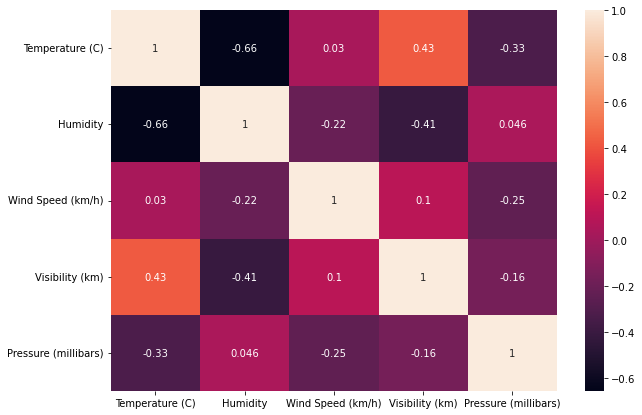

In [62]:
plt.figure(figsize=(10,7))
corr = X.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [63]:
Y = df3.Summary
Y.head()

0    Cloudy
1    Cloudy
3    Cloudy
5    Cloudy
6    Cloudy
Name: Summary, dtype: object

### Performing ZScore Standardization on X (predictor)

In [64]:
# from scipy import stats

# X = X.apply(stats.zscore)
# X.head()

# Training Machine Learning Models

In [65]:
from sklearn import metrics

##### Splitting X,Y into train, test data

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

## Training K Nearest Neighbor

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [69]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [70]:
Y_pred = knn.predict(X_test)

In [71]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)*100
percent = f"{accuracy:.2f}"
print("The model is providing %s percent accurate result." %percent)

The model is providing 81.53 percent accurate result.


##### Creating heatmap of Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[  596,  1878,    28],
       [  877, 10986,    86],
       [   10,   121,  1661]], dtype=int64)

Text(42.0, 0.5, 'Actual')

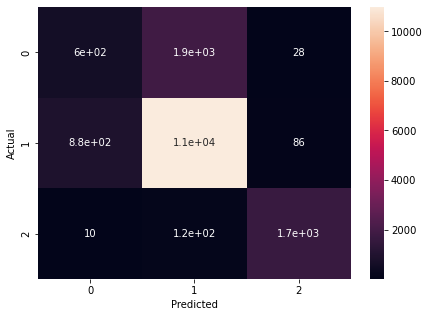

In [73]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

##### Creating Classifcation Report of KNN model #1

In [74]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       Clear       0.40      0.24      0.30      2502
      Cloudy       0.85      0.92      0.88     11949
       Foggy       0.94      0.93      0.93      1792

    accuracy                           0.82     16243
   macro avg       0.73      0.69      0.70     16243
weighted avg       0.79      0.82      0.80     16243



### Training 2nd KNN Model

In [75]:
knn_2 = KNeighborsClassifier(n_neighbors = 3, weights='distance')

In [76]:
knn_2.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [77]:
Y2_pred = knn_2.predict(X_test)

In [78]:
accuracy = metrics.accuracy_score(Y_test,Y2_pred)*100
percent = f"{accuracy:.2f}"
print("The model is providing %s percent accurate result." %percent)

The model is providing 80.40 percent accurate result.


### Training 3rd KNN Model

In [79]:
knn_3 = KNeighborsClassifier(n_neighbors = 20)

In [80]:
knn_3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

In [81]:
Y3_pred = knn_3.predict(X_test)

In [82]:
accuracy = metrics.accuracy_score(Y_test,Y3_pred)*100
percent = f"{accuracy:.2f}"
print("The model is providing %s percent accurate result." %percent)

The model is providing 83.17 percent accurate result.


##### Creating Heatmap of Confusion Matrix

Text(42.0, 0.5, 'Actual')

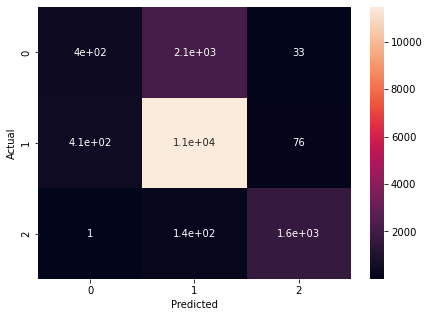

In [83]:
cm = confusion_matrix(Y_test, Y3_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

##### Creating Classification Report of KNN model #3

In [84]:
print(classification_report(Y_test, Y3_pred))

              precision    recall  f1-score   support

       Clear       0.49      0.16      0.24      2502
      Cloudy       0.84      0.96      0.89     11949
       Foggy       0.94      0.92      0.93      1792

    accuracy                           0.83     16243
   macro avg       0.76      0.68      0.69     16243
weighted avg       0.80      0.83      0.80     16243



## Training Logistic Regression Model

In [85]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train,Y_train)

LogisticRegression()

In [86]:
lg_predict = log_model.predict(X_test)

In [87]:
accuracy = metrics.accuracy_score(Y_test,lg_predict)*100
percent = f"{accuracy:.2f}"
print("The model is providing %s percent accurate result." %percent)

The model is providing 84.43 percent accurate result.


##### Creating heatmap of Confusion Matrix

Text(42.0, 0.5, 'Actual')

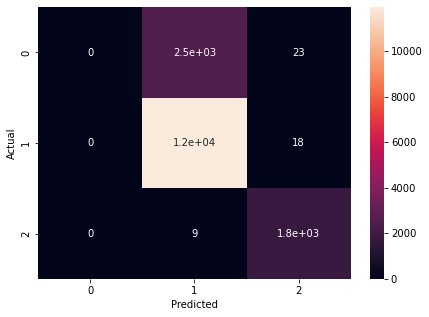

In [88]:
lg_cm = confusion_matrix(Y_test, lg_predict)

plt.figure(figsize=(7,5))
sns.heatmap(lg_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

##### Creating Classifcation report of Logistic Model #1

In [89]:
print(classification_report(Y_test, lg_predict))

              precision    recall  f1-score   support

       Clear       0.00      0.00      0.00      2502
      Cloudy       0.83      1.00      0.90     11949
       Foggy       0.98      0.99      0.99      1792

    accuracy                           0.84     16243
   macro avg       0.60      0.66      0.63     16243
weighted avg       0.72      0.84      0.77     16243



### Training 2nd Logistic Model

In [90]:
log_model_2 = LogisticRegression(penalty='elasticnet', C=0.5, solver='saga', l1_ratio=0.5)

log_model_2.fit(X_train,Y_train)

LogisticRegression(C=0.5, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [91]:
lg_2_predict = log_model_2.predict(X_test)

In [92]:
accuracy = metrics.accuracy_score(Y_test,lg_2_predict)*100
percent = f"{accuracy:.2f}"
print("The model is providing %s percent accurate result." %percent)

The model is providing 84.09 percent accurate result.


##### Creating Classifcation report of Logistic Model #2

In [93]:
print(classification_report(Y_test, lg_2_predict))

              precision    recall  f1-score   support

       Clear       0.00      0.00      0.00      2502
      Cloudy       0.83      1.00      0.90     11949
       Foggy       0.95      0.98      0.97      1792

    accuracy                           0.84     16243
   macro avg       0.59      0.66      0.62     16243
weighted avg       0.71      0.84      0.77     16243



### Training 3rd Logistic Model

In [94]:
log_model_3 = LogisticRegression(C=1.5)

log_model_3.fit(X_train,Y_train)

LogisticRegression(C=1.5)

In [95]:
lg_3_predict = log_model_3.predict(X_test)

In [96]:
accuracy = metrics.accuracy_score(Y_test,lg_3_predict)*100
percent = f"{accuracy:.2f}"
print("The model is providing %s percent accurate result." %percent)

The model is providing 84.46 percent accurate result.


##### Creating Classifcation report of Logistic Model #3

In [97]:
print(classification_report(Y_test, lg_3_predict))

              precision    recall  f1-score   support

       Clear       0.00      0.00      0.00      2502
      Cloudy       0.83      1.00      0.91     11949
       Foggy       0.98      1.00      0.99      1792

    accuracy                           0.84     16243
   macro avg       0.60      0.67      0.63     16243
weighted avg       0.72      0.84      0.77     16243



In [98]:
feature_names = X.columns
feature_names

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

### Plotting Feature Importance Graph on Logistic Regression Model #1

In [99]:
coefficients = log_model.coef_[0]
absolute_coefficients = abs(coefficients)

sorted_indices = absolute_coefficients.argsort()[::-1]
sorted_coefficients = absolute_coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices] 

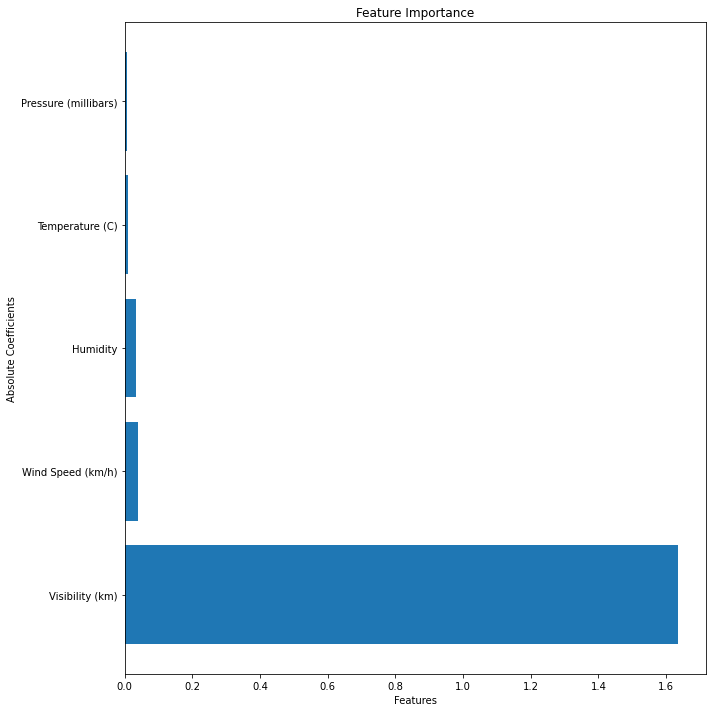

In [100]:
plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficients')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### Performing K Fold Cross Validation

In [101]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LogisticRegression(), X_train, Y_train, cv=cv)

array([0.84721937, 0.83931869, 0.84547507, 0.83490663, 0.83983173])

In [102]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv=cv)

array([0.814488  , 0.81541145, 0.81561666, 0.81561666, 0.81182023])

In [103]:
df2.head()

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,Partly Cloudy,9.472222,0.89,14.1197,15.8263,1015.13
1,Partly Cloudy,9.355556,0.86,14.2646,15.8263,1015.63
3,Partly Cloudy,8.288889,0.83,14.1036,15.8263,1016.41
5,Partly Cloudy,9.222222,0.85,13.9587,14.9569,1016.66
6,Partly Cloudy,7.733333,0.95,12.3648,9.9820,1016.72


In [104]:
df2.tail()

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
96448,Partly Cloudy,26.016667,0.43,10.9963,16.1000,1014.36
96449,Partly Cloudy,24.583333,0.48,10.0947,15.5526,1015.16
96450,Partly Cloudy,22.038889,0.56,8.9838,16.1000,1015.66
96451,Partly Cloudy,21.522222,0.60,10.5294,16.1000,1015.95
96452,Partly Cloudy,20.438889,0.61,5.8765,15.5204,1016.16


In [105]:
X.columns

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [106]:
Y_train.value_counts()

Cloudy    35903
Clear      7594
Foggy      5231
Name: Summary, dtype: int64

## Predicting 'Summary' 

In [107]:
def predict_summary(temperature,humidity,wind_speed,visbility,pressure):    
    
    x = np.zeros(len(X.columns))
    x[0] = temperature
    x[1] = humidity
    x[2] = wind_speed
    x[3] = visbility
    x[4] = pressure

    return knn_3.predict([x])[0]

In [108]:
predict_summary(26.016667, 0.43, 10.9963, 16.1000, 1014.36)

'Cloudy'

In [109]:
predict_summary(-15, 1, 5, 40, 1012)

'Clear'

In [110]:
knn_3.predict([[26.016667, 0.43, 10.9963, 16.1000, 1014.36]])

array(['Cloudy'], dtype=object)

In [111]:
knn_3.predict([[-15, 1, 5, 40, 1012]])

array(['Clear'], dtype=object)

In [112]:
knn_3.predict([[9.377778, 0.89, 3.9284, 14.9569, 1015.94]])

array(['Cloudy'], dtype=object)

In [113]:
knn_3.predict([[16.072222,0.88,2.7853,15.7297,1015.25]])

array(['Cloudy'], dtype=object)

In [114]:
knn_3.predict([[15.550000,0.63,11.1573,11.4471,1016.17]])

array(['Cloudy'], dtype=object)

In [115]:
predict_summary(9.377778, 0.89, 3.9284, 14.9569, 1015.94)

'Cloudy'

In [116]:
predict_summary(22.038889, 0.56, 8.9838, 16.1000, 1015.66)

'Cloudy'

In [117]:
predict_summary(-10, 0.9, 8, 1, 1018)

'Foggy'

In [118]:
def lg_predict_summary(temperature,humidity,wind_speed,visbility,pressure):    
    
    x = np.zeros(len(X.columns))
    x[0] = temperature
    x[1] = humidity
    x[2] = wind_speed
    x[3] = visbility
    x[4] = pressure

    return log_model_3.predict([x])[0]

In [119]:
lg_predict_summary(9.5, 0.9, 14, 16, 1015)

'Cloudy'

In [120]:
lg_predict_summary(-15, 1, 5, 40, 1012)

'Clear'

In [121]:
lg_predict_summary(-10, 0.9, 8, 1, 1018)

'Foggy'

In [122]:
lg_predict_summary(9.377778, 0.89, 3.9284, 14.9569, 1015.94)

'Cloudy'

In [123]:
knn_3.predict([[9.5, 0.9, 14, 16, 1015]])

array(['Cloudy'], dtype=object)

In [124]:
log_model_3.predict([[9.5, 0.9, 14, 16, 1015]])

array(['Cloudy'], dtype=object)

In [125]:
log_model_3.predict([[-10, 0.5, 14, 10, 1015]])

array(['Cloudy'], dtype=object)

In [135]:
import ipywidgets as widgets
from IPython.display import display

In [136]:
temperature_slider = widgets.FloatSlider(value=0, min=-20, max=40, step=0.1, description='Temperature:')
humidity_slider = widgets.FloatSlider(value=0, min=0, max=1, step=0.1, description='Humidity:')
wind_speed_slider = widgets.FloatSlider(value=0, min=0, max=100, step=1, description='Wind Speed:')
visibility_slider = widgets.FloatSlider(value=0, min=0, max=20, step=0.1, description='Visibility:')
pressure_slider = widgets.FloatSlider(value=1000, min=1000, max=1050, step=1, description='Pressure:')

In [137]:
predict_button = widgets.Button(description='Predict Weather')

In [141]:
def lg_predict_summary(temperature,humidity,wind_speed,visbility,pressure):    
    
    x = np.zeros(len(X.columns))
    x[0] = temperature
    x[1] = humidity
    x[2] = wind_speed
    x[3] = visbility
    x[4] = pressure

    return log_model_3.predict([x])[0]

def predict_weather(button):
    # Retrieve the slider values
    temperature = temperature_slider.value
    humidity = humidity_slider.value
    wind_speed = wind_speed_slider.value
    visibility = visibility_slider.value
    pressure = pressure_slider.value

    # Call your machine learning model to make a prediction
    prediction = predict_summary(temperature, humidity, wind_speed, visibility, pressure)

    # Display the prediction result
    prediction_label.value = 'Prediction: ' + prediction

In [142]:
predict_button.on_click(predict_weather)
prediction_label = widgets.Label()

In [143]:
display(temperature_slider, humidity_slider, wind_speed_slider, visibility_slider, 
        pressure_slider, predict_button, prediction_label)

FloatSlider(value=-13.3, description='Temperature:', max=40.0, min=-20.0)

FloatSlider(value=0.6, description='Humidity:', max=1.0)

FloatSlider(value=6.0, description='Wind Speed:', step=1.0)

FloatSlider(value=20.0, description='Visibility:', max=20.0)

FloatSlider(value=1024.0, description='Pressure:', max=1050.0, min=1000.0, step=1.0)

Button(description='Predict Weather', style=ButtonStyle())

Label(value='')

# Artificial Neural Networks

In [149]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.losses import CategoricalCrossentropy

Y_train_encoded = pd.get_dummies(Y_train)  
Y_train_numpy = Y_train_encoded.values      

## Model 1

In [208]:
input_layer = Input(shape=(5,))  
output_shape = Y_train_encoded.shape[1]     
output_layer = Dense(output_shape, activation='softmax')(input_layer)
modeld1 = Model(inputs=input_layer, outputs=output_layer)

modeld1.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [209]:
history = modeld1.fit(x=X_train, y=Y_train_numpy, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
1523/1523 - 3s - loss: 29.1515 - accuracy: 0.6066 - 3s/epoch - 2ms/step
Epoch 2/100
1523/1523 - 2s - loss: 0.5227 - accuracy: 0.8028 - 2s/epoch - 1ms/step
Epoch 3/100
1523/1523 - 2s - loss: 0.4809 - accuracy: 0.8200 - 2s/epoch - 1ms/step
Epoch 4/100
1523/1523 - 2s - loss: 0.4687 - accuracy: 0.8242 - 2s/epoch - 1ms/step
Epoch 5/100
1523/1523 - 2s - loss: 0.4614 - accuracy: 0.8250 - 2s/epoch - 1ms/step
Epoch 6/100
1523/1523 - 2s - loss: 0.4589 - accuracy: 0.8269 - 2s/epoch - 1ms/step
Epoch 7/100
1523/1523 - 2s - loss: 0.4555 - accuracy: 0.8279 - 2s/epoch - 1ms/step
Epoch 8/100
1523/1523 - 2s - loss: 0.4518 - accuracy: 0.8289 - 2s/epoch - 1ms/step
Epoch 9/100
1523/1523 - 2s - loss: 0.4454 - accuracy: 0.8324 - 2s/epoch - 1ms/step
Epoch 10/100
1523/1523 - 2s - loss: 0.4489 - accuracy: 0.8313 - 2s/epoch - 1ms/step
Epoch 11/100
1523/1523 - 2s - loss: 0.4476 - accuracy: 0.8319 - 2s/epoch - 1ms/step
Epoch 12/100
1523/1523 - 2s - loss: 0.4452 - accuracy: 0.8318 - 2s/epoch - 1ms/step


Epoch 99/100
1523/1523 - 2s - loss: 0.4452 - accuracy: 0.8332 - 2s/epoch - 1ms/step
Epoch 100/100
1523/1523 - 2s - loss: 0.4402 - accuracy: 0.8349 - 2s/epoch - 1ms/step


In [211]:
Y_test_encoded = pd.get_dummies(Y_test)  
Y_test_numpy = Y_test_encoded.values 

resultsd = modeld1.evaluate(X_test, Y_test_numpy, batch_size=10)
print('test acc:', resultsd[1])

1625/1625 [==============================] - 3s 2ms/step - loss: 0.5141 - accuracy: 0.8439
test acc: 0.8439327478408813


In [195]:
prediction = modeld1.predict([[-10, 0.9, 8, 1, 1018]])
predicted_value = prediction
predicted_index = np.argmax(predicted_value)

class_labels = ['Clear', 'Cloudy', 'Foggy']

predicted_class = class_labels[predicted_index]

print(predicted_class)

1/1 [==============================] - 0s 113ms/step
Foggy


## Model 2

In [180]:
input_layer = Input(shape=(5,))  
output_shape = Y_train_encoded.shape[1]     
output_layer = Dense(output_shape, activation='sigmoid')(input_layer)
modeld2 = Model(inputs=input_layer, outputs=output_layer)

modeld2.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [181]:
modeld2.fit(x=X_train, y=Y_train_numpy, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
1523/1523 - 2s - loss: 123.3920 - accuracy: 0.5086 - 2s/epoch - 2ms/step
Epoch 2/100
1523/1523 - 2s - loss: 0.8409 - accuracy: 0.7456 - 2s/epoch - 1ms/step
Epoch 3/100
1523/1523 - 2s - loss: 0.4789 - accuracy: 0.8228 - 2s/epoch - 1ms/step
Epoch 4/100
1523/1523 - 2s - loss: 0.4612 - accuracy: 0.8266 - 2s/epoch - 1ms/step
Epoch 5/100
1523/1523 - 2s - loss: 0.4548 - accuracy: 0.8281 - 2s/epoch - 1ms/step
Epoch 6/100
1523/1523 - 2s - loss: 0.4535 - accuracy: 0.8289 - 2s/epoch - 1ms/step
Epoch 7/100
1523/1523 - 2s - loss: 0.4563 - accuracy: 0.8248 - 2s/epoch - 1ms/step
Epoch 8/100
1523/1523 - 2s - loss: 0.4508 - accuracy: 0.8307 - 2s/epoch - 1ms/step
Epoch 9/100
1523/1523 - 2s - loss: 0.4474 - accuracy: 0.8302 - 2s/epoch - 1ms/step
Epoch 10/100
1523/1523 - 2s - loss: 0.4530 - accuracy: 0.8302 - 2s/epoch - 1ms/step
Epoch 11/100
1523/1523 - 2s - loss: 0.4467 - accuracy: 0.8324 - 2s/epoch - 1ms/step
Epoch 12/100
1523/1523 - 2s - loss: 0.4457 - accuracy: 0.8319 - 2s/epoch - 1ms/step

Epoch 99/100
1523/1523 - 2s - loss: 0.4424 - accuracy: 0.8340 - 2s/epoch - 1ms/step
Epoch 100/100
1523/1523 - 2s - loss: 0.4434 - accuracy: 0.8338 - 2s/epoch - 1ms/step


In [210]:
Y_test_encoded = pd.get_dummies(Y_test)  
Y_test_numpy = Y_test_encoded.values 

resultsd = modeld2.evaluate(X_test, Y_test_numpy, batch_size=10)
print('test acc:', resultsd[1])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

## Model 3

In [203]:
input_layer = Input(shape=(5,))  
output_shape = Y_train_encoded.shape[1]     
output_layer = Dense(output_shape, activation='softmax')(input_layer)
modeld3 = Model(inputs=input_layer, outputs=output_layer)

modeld3.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [204]:
modeld3.fit(x=X_train, y=Y_train_numpy, epochs=60, shuffle=True, verbose=2)

Epoch 1/60
1523/1523 - 3s - loss: 258.8307 - accuracy: 0.4113 - 3s/epoch - 2ms/step
Epoch 2/60
1523/1523 - 2s - loss: 3.0221 - accuracy: 0.6716 - 2s/epoch - 1ms/step
Epoch 3/60
1523/1523 - 2s - loss: 0.9196 - accuracy: 0.7512 - 2s/epoch - 1ms/step
Epoch 4/60
1523/1523 - 2s - loss: 0.4823 - accuracy: 0.8156 - 2s/epoch - 1ms/step
Epoch 5/60
1523/1523 - 2s - loss: 0.4688 - accuracy: 0.8224 - 2s/epoch - 1ms/step
Epoch 6/60
1523/1523 - 2s - loss: 0.4643 - accuracy: 0.8227 - 2s/epoch - 1ms/step
Epoch 7/60
1523/1523 - 2s - loss: 0.4622 - accuracy: 0.8217 - 2s/epoch - 1ms/step
Epoch 8/60
1523/1523 - 2s - loss: 0.4558 - accuracy: 0.8263 - 2s/epoch - 1ms/step
Epoch 9/60
1523/1523 - 2s - loss: 0.4497 - accuracy: 0.8280 - 2s/epoch - 1ms/step
Epoch 10/60
1523/1523 - 2s - loss: 0.4490 - accuracy: 0.8301 - 2s/epoch - 2ms/step
Epoch 11/60
1523/1523 - 2s - loss: 0.4480 - accuracy: 0.8302 - 2s/epoch - 1ms/step
Epoch 12/60
1523/1523 - 2s - loss: 0.4501 - accuracy: 0.8292 - 2s/epoch - 2ms/step
Epoch 13/60

In [206]:
Y_test_encoded = pd.get_dummies(Y_test)  
Y_test_numpy = Y_test_encoded.values 

resultsd = modeld3.evaluate(X_test, Y_test_numpy, batch_size=10)
print('test acc:', resultsd[1])

1625/1625 [==============================] - 3s 2ms/step - loss: 0.4363 - accuracy: 0.8414
test acc: 0.8414086103439331
